In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\domyw\Downloads\stack-overflow-developer-survey-2023\survey_results_public.csv')

In [96]:
columns = ['Country', 'EdLevel','YearsCodePro','Employment','ConvertedCompYearly']

df=df[columns]

In [97]:
df=df.rename({'ConvertedCompYearly':'Salary'}, axis=1)
df

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
...,...,...,...,...,...
89179,Brazil,"Associate degree (A.A., A.S., etc.)",5,"Employed, full-time;Independent contractor, fr...",NaN
89180,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time;Employed, part-time",NaN
89181,Israel,Something else,NaN,I prefer not to say,NaN
89182,Switzerland,"Secondary school (e.g. American high school, G...",NaN,"Employed, part-time;Student, part-time",NaN


In [98]:
df = df[df['Salary'].notnull()]
df

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0
...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,"Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,"Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Employed, full-time",64254.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [100]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [101]:
df = df[df['Employment']== 'Employed, full-time']

df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [102]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [103]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for x in range(len(categories)):
        if categories.values[x] >= cutoff:
            categorical_map[categories.index[x]] = categories.index[x]
            
        else:
            categorical_map[categories.index[x]] = 'Other'
            
    return categorical_map        

In [104]:
country_map = shorten_categories(df.Country.value_counts(), 400)

df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


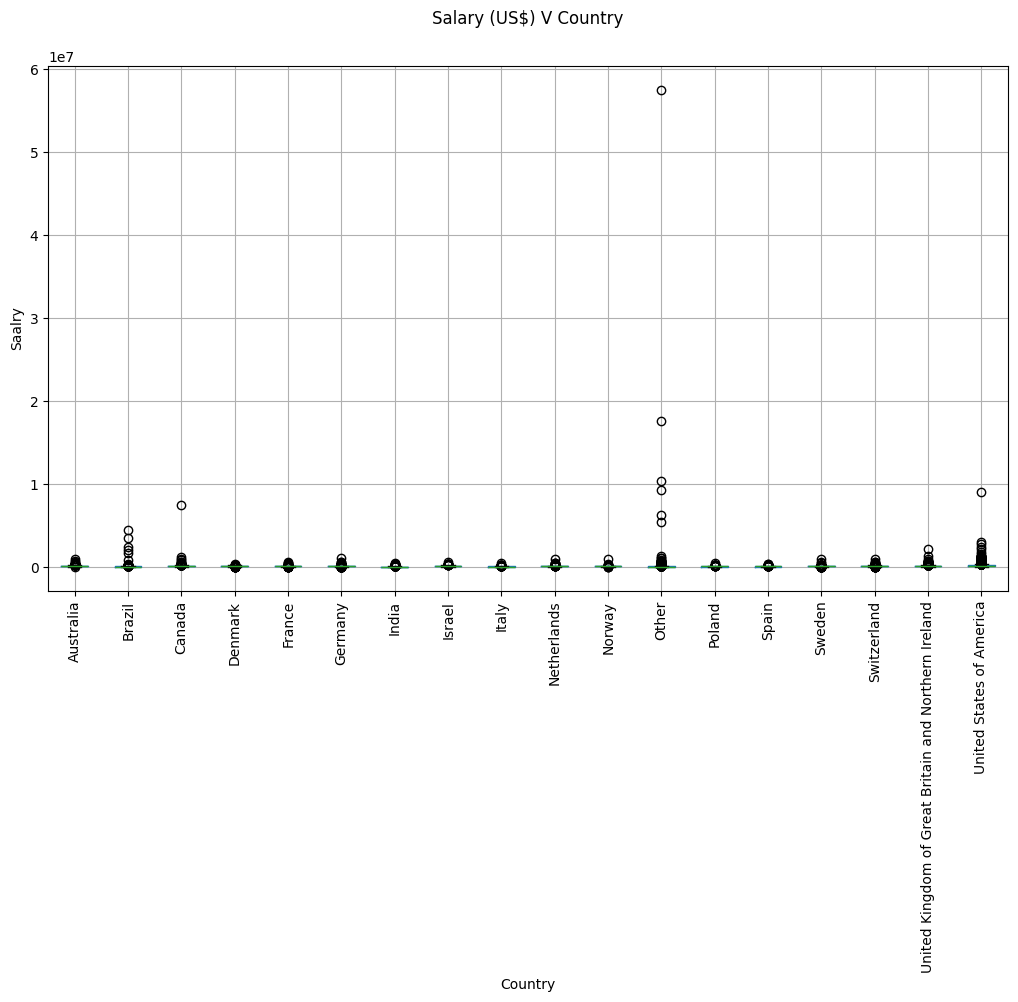

In [105]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Saalry')
plt.xticks(rotation=90)
plt.show()

In [106]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]

df = df[df['Country'] != 'Other']

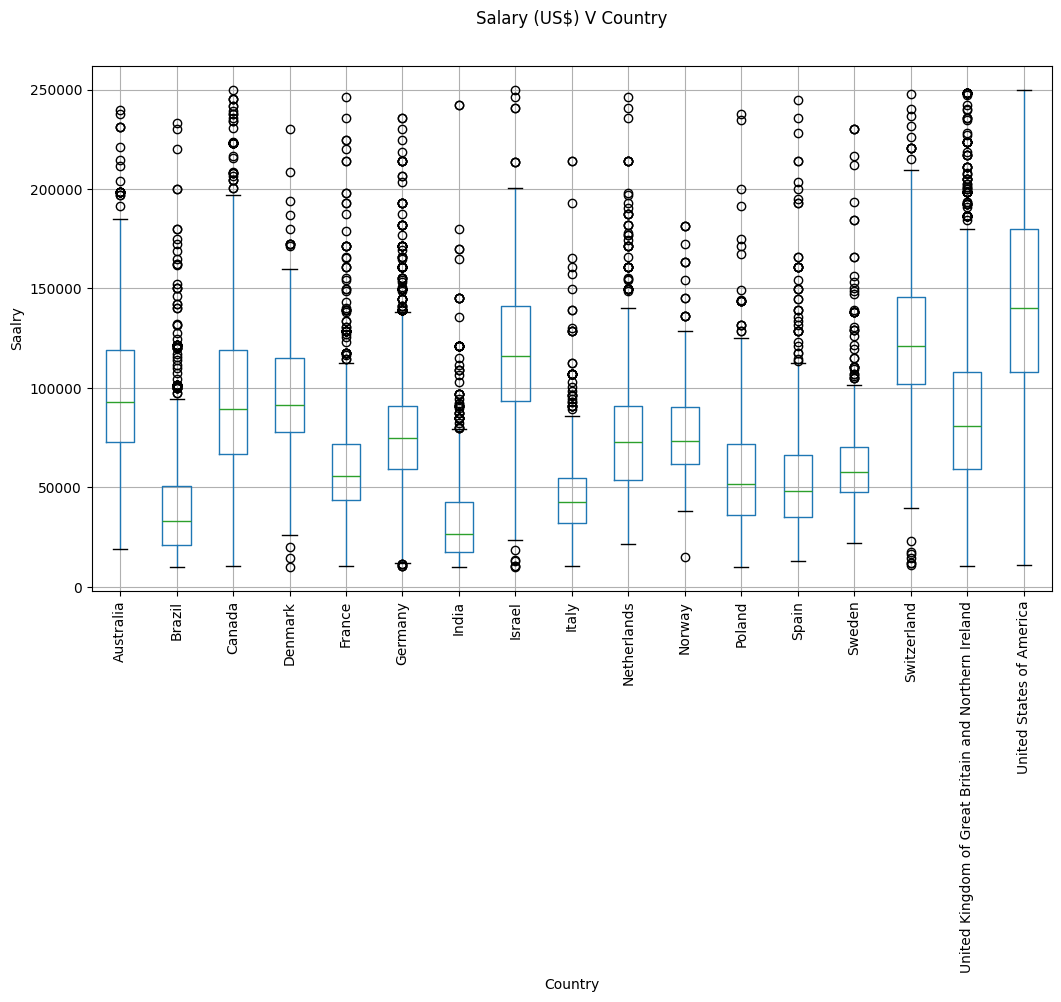

In [107]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Saalry')
plt.xticks(rotation=90)
plt.show()

In [108]:
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [109]:
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [110]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [111]:
def clean_education(x):
    if 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' in x:
        return "Bachelor's degree"
    
    if 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' in x:
        return "Master's degree"
    
    if "Professional degree" in x:
        return 'Post grad'
    
    return 'Less than a Bachelor'


df['EdLevel'] = df['EdLevel'].apply(clean_education)    

In [112]:
df['EdLevel'].unique()

array(["Bachelor's degree", 'Less than a Bachelor', "Master's degree",
       'Post grad'], dtype=object)

In [113]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [114]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [115]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [116]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X, y.values)

LinearRegression()

In [117]:
y_pred = linear_reg.predict(X)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))

In [119]:
error

46082.71046497013

In [120]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [121]:
y_pred = dec_tree_reg.predict(X)

In [122]:
error = np.sqrt(mean_squared_error(y, y_pred))

print("${:,.02f}".format(error))

$33,748.85


In [123]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [124]:
y_pred = random_forest_reg.predict(X)

In [125]:
error = np.sqrt(mean_squared_error(y, y_pred))

print("${:,.02f}".format(error))

$33,818.22


In [126]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [127]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_predict = regressor.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))

print("${:,.02f}".format(error))

$33,818.22


In [128]:
X

,Country,EdLevel,YearsCodePro
2,16,0,23.0
3,16,0,7.0
5,15,1,21.0
6,16,1,3.0
7,16,0,3.0
...,...,...,...
89156,16,0,8.0
89158,13,0,8.0
89162,1,2,24.0
89167,6,0,2.0


In [133]:
x = np.array([['United States of America', "Master's degree", 15]])
x

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [134]:
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x

array([[16.,  2., 15.]])

In [140]:
import warnings
warnings.filterwarnings('ignore')

y_pred = regressor.predict(x)

y_pred

array([171952.90990991])

In [136]:
import pickle

In [137]:
data = {'model': regressor, 'le_country': le_country, 'le_education': le_education}

with open('saves_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [138]:
with open('saves_steps.pkl', 'rb') as file:
    data=pickle.load(file)
    

regressor_loaded = data['model']  
le_country = data['le_country']
le_education = data['le_education']

In [139]:
y_pred = regressor_loaded.predict(x)

y_pred

C:\Users\domyw\test\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([171952.90990991])